In [749]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/widsdatathon2024-challenge2/solution_template.csv
/kaggle/input/widsdatathon2024-challenge2/train.csv
/kaggle/input/widsdatathon2024-challenge2/test.csv


In [750]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_row",None)
pd.set_option("display.max_column",None)

In [751]:
#Reading train and test  file to the dataframe
newData = pd.read_csv("/kaggle/input/widsdatathon2024-challenge2/train.csv")
testdata = pd.read_csv("/kaggle/input/widsdatathon2024-challenge2/test.csv")

# displaying the contents of the train data
newData.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,9.21,4.11,13.32,38.78,53.60,5.85,11.82,5.31,92.95,1.73,0.33,0.20,0.03,0.83,3.94,3.03,22.24,19.27,0.42,25.35,8.06,8.11,38.55,39.88,42.75,55.16,65.17,75.98,76.75,76.45,73.67,59.73,45.18,37.43,31.67,33.83,42.35,57.72,67.35,75.92,74.28,79.59,70.84,62.39,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
1,484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19.56,11.76,11.40,8.11,19.51,28028.04,76.71,1113.35,92026.84,638.60,29.37,10.93,35.26,35.33,12.46,6.04,18.49,36.35,52.51,7.45,9.19,5.21,88.75,6.44,0.

In [752]:
#Displaying contents of test data
testdata.head()

,patient_id,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18
0,730681,NaN,COMMERCIAL,LA,713,South,West South Central,55,F,NaN,1746,Malignant neoplasm of axillary tail of female ...,C7981,NaN,NaN,4639.07,72.66,41.50,11.40,13.44,11.42,11.45,12.56,13.08,14.26,7.71,4.73,50.02,49.98,42.37,14.70,34.76,8.18,3.30,38.83,40643.61,6.77,5.02,9.93,7.53,6.36,11.54,12.60,12.70,11.60,9.53,6.43,15.97,22663.32,74.78,1698.43,113973.9,671.07,37.23,21.30,36.81,26.95,9.74,5.21,14.94,38.47,49.41,8.08,12.89,4.88,66.51,29.06,0.40,0.37,0.10,0.66,2.91,2.52,20.33,27.62,0.55,29.71,8.18,5.79,51.34,53.19,54.23,64.00,72.08,81.10,80.89,82.15,79.95,68.38,53.90,48.64,42.32,48.58,54.30,64.82,71.66,80.19,80.20,81.40,77.97,68.84,52.59,52.09,46.08,46.21,58.97,69.57,74.68,80.54,84.27,86.11,78.99,69.81,62.72,58.46,47.79,54.72,63.75,72.19,73.58,80.75,86.61,83.09,80.58,71.67,62.00,52.89,56.28,60.76,63.94,69.87,71.66,78.19,82.68,80.93,76.97,68.88,61.15,49.82,42.66,58.12,62.21,62.23,78.34,81.96,83.58,82.22,80.20,69.73,53.14,51.34
1,334212,Black,NaN,NC,283,South,South Atlantic,60,F,40.00,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,10875.30,217.91,39.64,11.23,13.72,15.01,12.02,11.58,11.77,12.77,8.52,3.41,51.33,48.67,44.14,13.28,34.62,7.96,3.33,42.57,49924.38,4.59,3.83,6.58,5.27,5.90,13.16,13.99,18.14,10.65,11.39,6.49,17.88,26495.64,67.09,4034.71,119537.2,806.92,31.42,15.22,31.24,34.65,12.87,6.00,18.88,36.55,56.90,8.38,10.64,1.40,54.08,26.66,0.80,8.35,0.13,4.83,5.14,10.76,17.82,

In [753]:
# Shares the information of train and test data types
newData.info()

testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13173 entries, 0 to 13172
Columns: 152 entries, patient_id to metastatic_diagnosis_period
dtypes: float64(137), int64(4), object(11)
memory usage: 15.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5646 entries, 0 to 5645
Columns: 151 entries, patient_id to Average of Dec-18
dtypes: float64(137), int64(3), object(11)
memory usage: 6.5+ MB


In [754]:
#Describes the numerical columns dataset distribution
newData.describe()

,patient_id,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
count,13173.000000,13173.000000,13173.000000,4102.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13173.000000,13168.000000,13173.000000,1.316800e+04,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13140.000000,13170.000000,13173.000000,13173.000000,13170.000000,13153.000000,13173.000000,13156.000000,13146.000000,13114.000000,13170.000000,13170.000000,13169.000000,13164.000000,13144.000000,12993.000000,13173.000000,13021.000000,13173.000000,13173.000000,13173.000000,13173.000000,13149.000000,13173.000000,13167.000000,13161.000000,13161.00000,13145.000000,13173.000000,13173.000000,13173.000000,13151.000000,13173.000000,13157.000000,13157.000000,13155.000000,13157.000000,13157.000000,13173.000000,13173.000000,13154.000000,13173.000000,13157.000000,13173.000000,13173.000000,13173.000000,13170.000000,13160.000000,13164.000000,13173.000000,13173.000000,13173.000000,13173.000000,13172.000000,13142.000000,13173.000000,13163.0

In [755]:
#Data types of the train data set
traindtypes = newData.dtypes
print(traindtypes)

patient_id                                 int64
patient_race                              object
payer_type                                object
patient_state                             object
patient_zip3                               int64
Region                                    object
Division                                  object
patient_age                                int64
patient_gender                            object
bmi                                      float64
breast_cancer_diagnosis_code              object
breast_cancer_diagnosis_desc              object
metastatic_cancer_diagnosis_code          object
metastatic_first_novel_treatment          object
metastatic_first_novel_treatment_type     object
population                               float64
density                                  float64
age_median                               float64
age_under_10                             float64
age_10_to_19                             float64
age_20s             

In [756]:
#Finding Missing Values of train dataset
newData.isnull().sum().sort_values()

patient_id                                   0
Average of Apr-13                            0
Average of Mar-13                            0
veteran                                      0
health_uninsured                             0
commute_time                                 0
disabled                                     0
hispanic                                     0
race_multiple                                0
race_other                                   0
race_pacific                                 0
race_native                                  0
race_asian                                   0
race_black                                   0
race_white                                   0
unemployment_rate                            0
labor_force_participation                    0
education_stem_degree                        0
education_college_or_above                   0
education_graduate                           0
education_bachelors                          0
education_som

In [757]:
#Finding Missing Values of test dataset
testdata.isnull().sum().sort_values()

patient_id                                  0
Average of May-13                           0
Average of Apr-13                           0
Average of Mar-13                           0
Average of Feb-13                           0
veteran                                     0
health_uninsured                            0
commute_time                                0
poverty                                     0
disabled                                    0
hispanic                                    0
race_multiple                               0
Average of Jul-13                           0
race_other                                  0
race_native                                 0
race_asian                                  0
race_black                                  0
race_white                                  0
farmer                                      0
self_employed                               0
unemployment_rate                           0
labor_force_participation         

In [758]:
# The missing values for few columns are more than 50%. lets drop the columns from datasets as there is no enough info.
#Now impute the missing values of remaining columns with mode for categorical columns and mean for numerical columns.
newData["payer_type"] = newData["payer_type"].fillna(newData["payer_type"].mode()[0])
testdata["payer_type"] = testdata["payer_type"].fillna(testdata["payer_type"].mode()[0])

In [759]:
newData.drop(["patient_race","patient_gender","bmi","metastatic_first_novel_treatment","metastatic_first_novel_treatment_type"],axis = 1 , inplace = True)
testdata.drop(["patient_race","patient_gender","bmi","metastatic_first_novel_treatment","metastatic_first_novel_treatment_type"],axis = 1 , inplace = True)

In [760]:
#Fill the numerical column missing values with mean.

nullcol = newData.columns[newData.isna().sum() > 0].tolist()
nullcol

['family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'home_ownership',
 'home_value',
 'rent_median',
 'rent_burden',
 'self_employed',
 'farmer',
 'poverty',
 'limited_english',
 'Average of Jan-13',
 'Average of Feb-13',
 'Average of May-13',
 'Average of Jun-13',
 'Average of Aug-13',
 'Average of Sep-13',
 'Average of Oct-13',
 'Average of Nov-13',
 'Average of Dec-13',
 'Average of Jan-14',
 'Average of Feb-14',
 'Average of Mar-14',
 'Average of Apr-14',
 'Average of Jun-14',
 'Average of Nov-14',
 'Average of Jan-15',
 'Average of Feb-15',
 'Average of Mar-15',
 'Average of Apr-15',
 'Average of Aug-15',
 'A

In [761]:
for i in nullcol:
    newData[i].fillna(newData[i].mean(),inplace = True)
    testdata[i].fillna(testdata[i].mean(),inplace = True)

/tmp/ipykernel_33/2960276284.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  newData[i].fillna(newData[i].mean(),inplace = True)
/tmp/ipykernel_33/2960276284.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [762]:
#Check if any missing values are available.
newData.isnull().sum()

patient_id                          0
payer_type                          0
patient_state                       0
patient_zip3                        0
Region                              0
Division                            0
patient_age                         0
breast_cancer_diagnosis_code        0
breast_cancer_diagnosis_desc        0
metastatic_cancer_diagnosis_code    0
population                          0
density                             0
age_median                          0
age_under_10                        0
age_10_to_19                        0
age_20s                             0
age_30s                             0
age_40s                             0
age_50s                             0
age_60s                             0
age_70s                             0
age_over_80                         0
male                                0
female                              0
married                             0
divorced                            0
never_marrie

In [763]:
outliercol = newData.columns[newData.dtypes == "float"].to_list()
outliercol

['population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_individual_median',
 'home_ownership',
 'housing_units',
 'home_value',
 'rent_median',
 'rent_burden',
 'education_less_highschool',
 'education_highschool',
 'education_some_college',
 'education_bachelors',
 'education_graduate',
 'education_college_or_above',
 'education_stem_degree',
 'labor_force_participation',
 '

In [764]:
for i in outliercol:
    uq = np.percentile(newData[i],75)
    lq = np.percentile(newData[i],25)
    iqr = uq-lq
    uw = uq+1.5*iqr
    lw = lq-1.5*iqr
    print("Outliers count in ", i, ":",len(newData[newData[i]>=uw]))
    newData.loc[newData[i] >=uw , i ] = uw
    newData.loc[newData[i] <=lw, i] = lw
    print("Current Outliers count in ", i,":", len(newData[newData[i]>uw]))
    newData[i] = newData[i].astype(int)

Outliers count in  population : 183
Current Outliers count in  population : 0
Outliers count in  density : 1193
Current Outliers count in  density : 0
Outliers count in  age_median : 53
Current Outliers count in  age_median : 0
Outliers count in  age_under_10 : 79
Current Outliers count in  age_under_10 : 0
Outliers count in  age_10_to_19 : 179
Current Outliers count in  age_10_to_19 : 0
Outliers count in  age_20s : 396
Current Outliers count in  age_20s : 0
Outliers count in  age_30s : 490
Current Outliers count in  age_30s : 0
Outliers count in  age_40s : 40
Current Outliers count in  age_40s : 0
Outliers count in  age_50s : 100
Current Outliers count in  age_50s : 0
Outliers count in  age_60s : 215
Current Outliers count in  age_60s : 0
Outliers count in  age_70s : 291
Current Outliers count in  age_70s : 0
Outliers count in  age_over_80 : 466
Current Outliers count in  age_over_80 : 0
Outliers count in  male : 429
Current Outliers count in  male : 0
Outliers count in  female : 118


In [765]:
newData.head(10)

,patient_id,payer_type,patient_state,patient_zip3,Region,Division,patient_age,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
0,268700,COMMERCIAL,AR,724,South,West South Central,39,C50912,Malignant neoplasm of unspecified site of left...,C773,3924,82,42,11,13,10,11,12,13,13,10,3,51,48,51,16,23,8,3,43,44483,2,3,8,7,7,13,15,17,11,8,3,12,24048,72,1513,87384,641,27,16,41,28,9,4,13,38,53,5,11,5,92,1,0,0,0,0,3,3,22,19,0,25,8,8,38,39,42,55,65,75,76,76,73,59,45,37,31,33,42,57,67,75,74,79,70,62,41,41,35,31,45,60,68,77,81,76,73,60,51,48,35,42,53,61,66,82,81,79,75,65,53,39,41,49,52,63,67,75,80,76,72,62,49,39,31,41,50,52,74,79,81,78,74,59,42,41,191
1,484983,COMMERCIAL,IL,629,Midwest,East North Central,55,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,2745,51,43,11,12,11,11,11,14,14,9,5,49,50,49,15,26,8,3,41,51796,3,3,6,5,5,11,13,19,11,11,8,19,28028,76,1113,92026,638,29,10,35,35,12,6,18,36,52,7,9,5,88,6,0,0,0,0,3,2,20,16,0,26,6,9,34,36,39,54,65,73,74,74,70,57,42,33,26,28,40,56,66,75,72,77,67,58,38,38,32,25,43,58,66,75,78,73,70,58,50,46,32,38,51,58,64,78,79,78,72,63,50,34,39,45,48,60,65,74,79,73,70,59,46,35,28,40,44,49,72,77,77,75,72,58,39,39,33
2,277055,COMMERCIAL,CA,925,West,Pacific,59,1749,"Malignant neoplasm of breast (female), unspeci...",C773,38343,700,36,13,15,13,13,12,11,10,6,3,49,50,48,11,34,4,3,52,78696,2,1,3,3,3,7,10,16,13,19,18,37,32818,66,10825,392600,1631,35,16,27,33,13,8,22,43,59,7,13,0,53,6,5,0,0,17,11,46,12,12,4,37,8,7,53,55,64,67,73,79,84,83,79,67,61,55,60,60,65,68,74,78,84,82,81,74,63,56,58,62,67,67,68,80,80,85,82,75,59,53,54,63,63,67,69,82,84,84,77,72,64,55,53,58,65,68,71,8

In [766]:
for i in outliercol:
    uq = np.percentile(testdata[i],75)
    lq = np.percentile(testdata[i],25)
    iqr = uq-lq
    uw = uq+1.5*iqr
    lw = lq-1.5*iqr
    print("Outliers count in ", i, ":",len(testdata[testdata[i]>=uw]))
    testdata.loc[testdata[i] >=uw , i ] = uw
    testdata.loc[testdata[i] <=lw, i] = lw
    print("Current Outliers count in ", i,":", len(testdata[testdata[i]>uw]))
    testdata[i] = testdata[i].astype(int)

Outliers count in  population : 91
Current Outliers count in  population : 0
Outliers count in  density : 538
Current Outliers count in  density : 0
Outliers count in  age_median : 23
Current Outliers count in  age_median : 0
Outliers count in  age_under_10 : 28
Current Outliers count in  age_under_10 : 0
Outliers count in  age_10_to_19 : 104
Current Outliers count in  age_10_to_19 : 0
Outliers count in  age_20s : 174
Current Outliers count in  age_20s : 0
Outliers count in  age_30s : 188
Current Outliers count in  age_30s : 0
Outliers count in  age_40s : 20
Current Outliers count in  age_40s : 0
Outliers count in  age_50s : 46
Current Outliers count in  age_50s : 0
Outliers count in  age_60s : 90
Current Outliers count in  age_60s : 0
Outliers count in  age_70s : 101
Current Outliers count in  age_70s : 0
Outliers count in  age_over_80 : 200
Current Outliers count in  age_over_80 : 0
Outliers count in  male : 202
Current Outliers count in  male : 0
Outliers count in  female : 61
Curre

In [767]:
#Lets check categorical columns data
newData["patient_state"].nunique()

44

In [768]:
newData["patient_state"].unique()

array(['AR', 'IL', 'CA', 'IN', 'OH', 'DE', 'LA', 'PA', 'MN', 'MI', 'NY',
       'FL', 'CO', 'KY', 'GA', 'TX', 'VA', 'NC', 'HI', 'NM', 'NV', 'MD',
       'TN', 'MO', 'SC', 'AZ', 'UT', 'WA', 'NE', 'OR', 'IA', 'ID', 'WI',
       'OK', 'AL', 'MT', 'SD', 'KS', 'AK', 'WY', 'MS', 'DC', 'WV', 'ND'],
      dtype=object)

In [769]:
newData["patient_zip3"].nunique()

751

In [770]:
newData["Region"].nunique()


4

In [771]:
newData["Region"].unique()

array(['South', 'Midwest', 'West', 'Northeast'], dtype=object)

In [772]:
newData["Division"].nunique()

8

In [773]:
newData["Division"].unique()

array(['West South Central', 'East North Central', 'Pacific',
       'South Atlantic', 'Middle Atlantic', 'West North Central',
       'Mountain', 'East South Central'], dtype=object)

In [774]:
newData.groupby(["Region","Division"]).size().reset_index(name="count")

,Region,Division,count
0,Midwest,East North Central,3010
1,Midwest,West North Central,756
2,Northeast,Middle Atlantic,1721
3,South,East South Central,494
4,South,South Atlantic,1968
5,South,West South Central,1498
6,West,Mountain,1029
7,West,Pacific,2697


In [775]:
newData.groupby(["patient_state","Division"]).size().reset_index(name="count")

,patient_state,Division,count
0,AK,Pacific,7
1,AL,East South Central,30
2,AR,West South Central,81
3,AZ,Mountain,243
4,CA,Mountain,1
5,CA,Pacific,2376
6,CO,Mountain,364
7,DC,South Atlantic,15
8,DE,South Atlantic,19
9,FL,South Atlantic,587


In [776]:
#The state "CA" is available in two divisions "Mountain" & "Pacific" with 1 count in Mountain , 
#Drop the row as data in remaining columns is provided as per the zip code of each state.

i = newData[((newData.patient_state == "CA") & (newData.Division == "Mountain"))].index
newData = newData.drop(i)

In [777]:

i = testdata[((testdata.patient_state == "CA") & (testdata.Division == "Mountain"))].index
testdata = testdata.drop(i)

In [778]:
#Similar issue is found in state "IL" for zip code "630"
newData.groupby(["patient_zip3","patient_state"]).size().reset_index(name="count")

,patient_zip3,patient_state,count
0,100,NY,109
1,101,NY,2
2,103,NY,41
3,104,NY,118
4,105,NY,36
5,106,NY,4
6,107,NY,11
7,108,NY,5
8,109,NY,22
9,110,NY,16


In [779]:
i = newData[((newData.patient_state == "IL") & (newData.patient_zip3 == 630))].index
newData = newData.drop(i)

In [780]:
i = testdata[((testdata.patient_state == "IL") & (testdata.patient_zip3 == 630))].index
testdata = testdata.drop(i)

In [781]:
newData["breast_cancer_diagnosis_code"].nunique()

47

In [782]:
newData["breast_cancer_diagnosis_code"].unique()

array(['C50912', 'C50412', '1749', 'C50911', '1748', 'C50411', 'C50212',
       'C50811', 'C50919', 'C50211', '1744', 'C50012', 'C50112', 'C50812',
       'C50311', 'C50011', 'C50511', 'C50512', '1741', 'C50819', '1745',
       '1742', 'C50312', '19881', 'C50219', 'C50111', 'C50611', '1743',
       'C50612', 'C5091', 'C5011', 'C50519', 'C50421', 'C50319', 'C50419',
       'C5041', 'C5081', '1746', 'C5031', 'C50922', 'C50119', 'C5001',
       'C50221', 'C509', 'C50019', 'C50122', 'C50619'], dtype=object)

In [783]:
newData["breast_cancer_diagnosis_desc"].unique()

array(['Malignant neoplasm of unspecified site of left female breast',
       'Malig neoplasm of upper-outer quadrant of left female breast',
       'Malignant neoplasm of breast (female), unspecified',
       'Malignant neoplasm of unsp site of right female breast',
       'Malignant neoplasm of other specified sites of female breast',
       'Malig neoplm of upper-outer quadrant of right female breast',
       'Malig neoplasm of upper-inner quadrant of left female breast',
       'Malignant neoplasm of ovrlp sites of right female breast',
       'Malignant neoplasm of unsp site of unspecified female breast',
       'Malig neoplm of upper-inner quadrant of right female breast',
       'Malignant neoplasm of upper-outer quadrant of female breast',
       'Malignant neoplasm of nipple and areola, left female breast',
       'Malignant neoplasm of central portion of left female breast',
       'Malignant neoplasm of ovrlp sites of left female breast',
       'Malig neoplm of lower-inner 

In [784]:
# 'Malig neoplasm of upper-outer quadrant of right male breast','Malignant neoplasm of unspecified site of left male breast','Malig neoplasm of upper-inner quadrant of right male breast',
#'Malignant neoplasm of central portion of left male breast',
desc_rows = ['Malig neoplasm of upper-outer quadrant of right male breast','Malignant neoplasm of unspecified site of left male breast','Malig neoplasm of upper-inner quadrant of right male breast','Malignant neoplasm of central portion of left male breast']
i = newData[((newData.breast_cancer_diagnosis_desc == 'Malig neoplasm of upper-outer quadrant of right male breast') |
             (newData.breast_cancer_diagnosis_desc == 'Malignant neoplasm of unspecified site of left male breast') |
             (newData.breast_cancer_diagnosis_desc == 'Malig neoplasm of upper-inner quadrant of right male breast')|
             (newData.breast_cancer_diagnosis_desc == 'Malignant neoplasm of central portion of left male breast'))].index
newData = newData.drop(i)


In [785]:
desc_rows = ['Malig neoplasm of upper-outer quadrant of right male breast','Malignant neoplasm of unspecified site of left male breast','Malig neoplasm of upper-inner quadrant of right male breast','Malignant neoplasm of central portion of left male breast']
i = testdata[((testdata.breast_cancer_diagnosis_desc == 'Malig neoplasm of upper-outer quadrant of right male breast') |
             (testdata.breast_cancer_diagnosis_desc == 'Malignant neoplasm of unspecified site of left male breast') |
             (testdata.breast_cancer_diagnosis_desc == 'Malig neoplasm of upper-inner quadrant of right male breast')|
             (testdata.breast_cancer_diagnosis_desc == 'Malignant neoplasm of central portion of left male breast'))].index
testdata = testdata.drop(i)

In [786]:
newData["breast_cancer_diagnosis_desc"].nunique()

43

In [787]:
newData["metastatic_cancer_diagnosis_code"].nunique()

43

In [788]:
testdata["metastatic_cancer_diagnosis_code"].nunique()

38

In [789]:
newData["metastatic_cancer_diagnosis_code"].unique()

array(['C773', 'C7951', 'C786', 'C799', 'C792', 'C7989', 'C7981', 'C7801',
       'C7800', 'C787', 'C779', 'C7931', 'C782', 'C785', 'C7982', 'C771',
       'C775', 'C7802', 'C770', 'C772', 'C7889', 'C781', 'C778', 'C784',
       'C7960', 'C7949', 'C7911', 'C7952', 'C7970', 'C7932', 'C774',
       'C7940', 'C7971', 'C7910', 'C7901', 'C7962', 'C7880', 'C7961',
       'C7839', 'C7972', 'C795', 'C798', 'C7900'], dtype=object)

In [790]:
cancer_codes = newData["metastatic_cancer_diagnosis_code"].unique()
cancer_codes

array(['C773', 'C7951', 'C786', 'C799', 'C792', 'C7989', 'C7981', 'C7801',
       'C7800', 'C787', 'C779', 'C7931', 'C782', 'C785', 'C7982', 'C771',
       'C775', 'C7802', 'C770', 'C772', 'C7889', 'C781', 'C778', 'C784',
       'C7960', 'C7949', 'C7911', 'C7952', 'C7970', 'C7932', 'C774',
       'C7940', 'C7971', 'C7910', 'C7901', 'C7962', 'C7880', 'C7961',
       'C7839', 'C7972', 'C795', 'C798', 'C7900'], dtype=object)

In [791]:
testcancer_codes = testdata["metastatic_cancer_diagnosis_code"].unique()
testcancer_codes

array(['C7981', 'C773', 'C7951', 'C787', 'C7931', 'C779', 'C792', 'C785',
       'C786', 'C7989', 'C782', 'C7800', 'C770', 'C7801', 'C771', 'C799',
       'C778', 'C7949', 'C784', 'C7970', 'C7889', 'C7952', 'C775', 'C772',
       'C7802', 'C7839', 'C774', 'C7960', 'C7911', 'C7919', 'C7910',
       'C7961', 'C7982', 'C7830', 'C781', 'C7940', 'C798', 'C7932'],
      dtype=object)

In [792]:
j = 0
for i in testcancer_codes:
    if i not in cancer_codes:
        print(i)
        j = j+1

print(j)
        

C7919
C7830
2


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


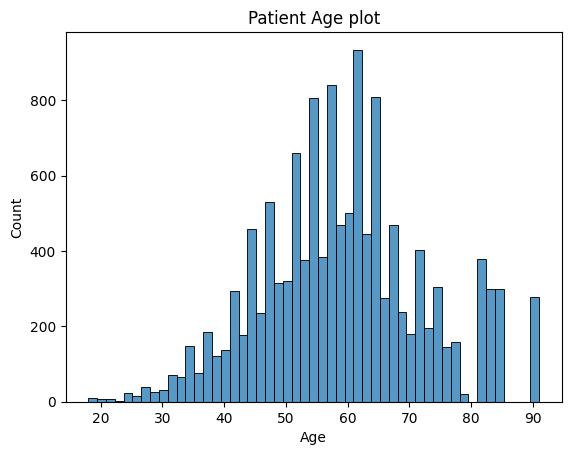

In [793]:
#Lets Visualise the data
#Age distribution
sns.histplot(newData["patient_age"])
plt.title("Patient Age plot")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:486: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if np.isscalar(data[0]):


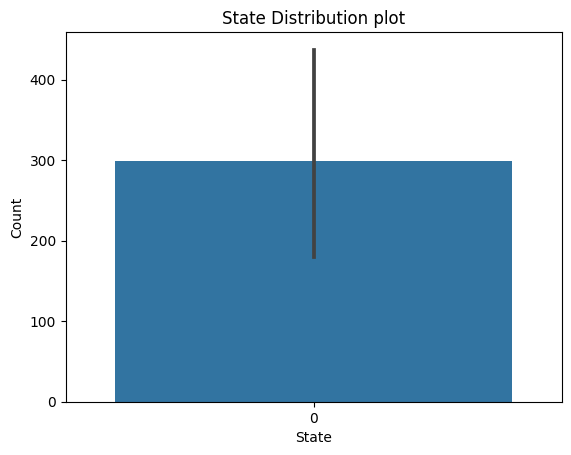

In [794]:
#State list
sns.barplot(newData["patient_state"].value_counts())
plt.title("State Distribution plot")
plt.xlabel("State")
plt.ylabel("Count")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


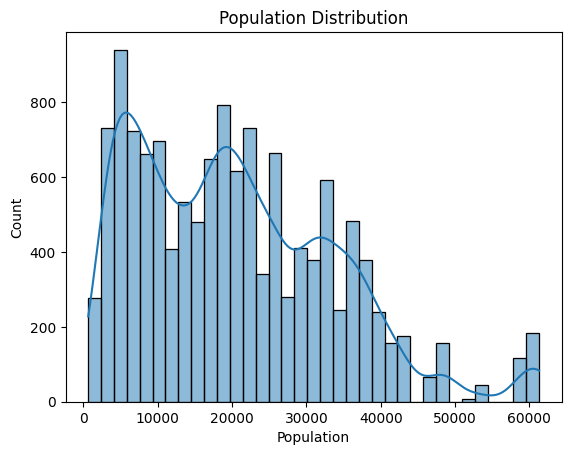

In [795]:
#Population Distribution list 
sns.histplot(newData["population"],kde = True)
plt.title("Population Distribution")
plt.xlabel("Population")
plt.ylabel("Count")
plt.show()

In [796]:
#Label Encoding 
#Lets encode categorical data type into numerical data by encoding 

cols = ["payer_type","patient_state","Region","Division","breast_cancer_diagnosis_code","breast_cancer_diagnosis_desc","metastatic_cancer_diagnosis_code"]

In [797]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
for i in cols:
    newData[i] = labelencoder.fit_transform(newData[i])
    testdata[i] = labelencoder.fit_transform(testdata[i])

In [798]:
months_list = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

# Iterating from each month to get average temperature in train as well as test data
for i in months_list:
    cols = [col for col in newData.columns if col.startswith(f"Average of {i}")]
    newData[f"Average of {i}"] = (newData[cols].sum(axis = 1)/len(cols)).astype(int)
    testdata[f"Average of {i}"] = (testdata[cols].sum(axis = 1)/len(cols)).astype(int)
    newData.drop(cols,axis = 1, inplace = True) # droping those columns whose average are taken above
    testdata.drop(cols,axis =1, inplace = True)
    

/tmp/ipykernel_33/1677259972.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  newData[f"Average of {i}"] = (newData[cols].sum(axis = 1)/len(cols)).astype(int)
/tmp/ipykernel_33/1677259972.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  testdata[f"Average of {i}"] = (testdata[cols].sum(axis = 1)/len(cols)).astype(int)
/tmp/ipykernel_33/1677259972.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all colum

In [799]:
newData.head(10)

,patient_id,payer_type,patient_state,patient_zip3,Region,Division,patient_age,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,metastatic_diagnosis_period,Average of Jan,Average of Feb,Average of Mar,Average of Apr,Average of May,Average of Jun,Average of Jul,Average of Aug,Average of Sep,Average of Oct,Average of Nov,Average of Dec
0,268700,0,2,724,2,7,39,41,38,3,3924,82,42,11,13,10,11,12,13,13,10,3,51,48,51,16,23,8,3,43,44483,2,3,8,7,7,13,15,17,11,8,3,12,24048,72,1513,87384,641,27,16,41,28,9,4,13,38,53,5,11,5,92,1,0,0,0,0,3,3,22,19,0,25,8,8,191,35,39,47,58,67,77,78,77,72,61,46,40
1,484983,0,13,629,0,0,55,26,6,3,2745,51,43,11,12,11,11,11,14,14,9,5,49,50,49,15,26,8,3,41,51796,3,3,6,5,5,11,13,19,11,11,8,19,28028,76,1113,92026,638,29,10,35,35,12,6,18,36,52,7,9,5,88,6,0,0,0,0,3,2,20,16,0,26,6,9,33,31,35,44,55,66,75,76,75,70,58,44,37
2,277055,0,4,925,3,4,59,7,16,3,38343,700,36,13,15,13,13,12,11,10,6,3,49,50,48,11,34,4,3,52,78696,2,1,3,3,3,7,10,16,13,19,18,37,32818,66,10825,392600,1631,35,16,27,33,13,8,22,43,59,7,13,0,53,6,5,0,0,17,11,46,12,12,4,37,8,7,157,56,59,64,67,70,79,84,83,79,72,62,55
3,320055,1,4,900,3,4,59,40,36,3,36054,3921,36,9,11,17,17,13,12,9,5,3,50,49,33,11,50,4,3,55,69266,6,2,6,4,4,7,10,14,10,13,18,32,36053,31,12949,763010,1651,37,22,18,21,23,13,37,41,64,8,21,0,42,12,12,1,0,17,8,45,11,20,13,30,10,3,146,60,60,62,63,64,68,72,73,73,70,65,59
4,190386,0,4,934,3,4,71,6,31,30,13700,400,41,10,16,12,11,10,11,13,8,5,51,48,48,11,35,5,3,51,82314,2,1,2,2,4,6,11,16,12,17,22,39,34754,58,4692,602986,1631,34,13,21,34,19,12,31,48,55,6,14,1,75,3,3,0,0,7,9,34,11,10,5,23,6,8,286,54,55,58,60,61,66,68,68,68,65,58,52
5,559027,0,14,461,0,0,63,7,16,16,9322,274,40,12,13,11,11,12,13,13,7,3,50,49,57,12,23,6,3,56,73079,1,0,3,5,3,9,10,19,16,19,10,30,35960,79,3506,171569,944,24,9,41,28,14,6,20,43,64,4,11,3,94,1,0,0,0,0,2,2,12,8,0,29,5,7,73,26,29,38,52,64,72,72,72,68,55,40,32
6,293747,2,30,448,0,0,57,26,6,42,5890,122,42,12,13,10,10,13,13,14,7,4,49,50,55,12,24,7,2,53,62050,2,1,2,4,6,8,14,22,15,15,6,22,31690,77,2382,133147,763,22,9,45,28,11,4,16,36,62,4,9,5,94,1,0,0,0,0,3,3,13,11,0,24,7,8,59,24,26,34,47,61,69,72,71,66,54,39,32
7,517596,0,7,198,2,5,56,25,11,24,22036,1450,41,11,11,12,13,11,13,12,7,4,47,52,42,13,38,6,3,52,77890,3,3,3,3,3,7,10,15,12,16,20,36,44135,63,9126,301069,1196,30,7,27,22,23,19,42,42,64,6,10,0,64,25,4,0,0,2,3,7,13,12,1,23,4,6,316,30,34,39,52,62,73,76,74,68,57,44,38
8,533188,0,17,706,2,7,65,18,4,3,7219,531,39,12,14,11,12,11,14,12,5,4,50,49,49,17,27,6,3,41,57309,2,3,4,7,7,11,10,17,11,13,9,23,29375,78,2607,140828,810,29,14,40,27,12,4,17,35,54,6,9,4,83,11,0,0,0,0,2,2,17,15,0,29,7,6,86,49,55,61,66,73,80,82,81,78,69,58,53
9,639484,0,4,922,3,4,60,41,38,3,16549,245,44,9,10,13,11,9,15,14,10,5,53,46,46,13,33,6,3,37,51006,5,3,6,7,5,10,15,14,9,11,10,21,25926,66,5983,262980,1075,35,21,26,32,12,6,18,42,52,10,13,0,61,3,1,1,0,17,13,48,16,19,13,24,8,10,184,54,59,64,69,74,85,89,88,82,72,61,53


In [800]:
#Prepping Input and Output datasets from train data
Input_X = newData.drop(columns = ["metastatic_diagnosis_period"])
Output_Y = newData["metastatic_diagnosis_period"]

In [801]:
Input_X.head(10)

,patient_id,payer_type,patient_state,patient_zip3,Region,Division,patient_age,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan,Average of Feb,Average of Mar,Average of Apr,Average of May,Average of Jun,Average of Jul,Average of Aug,Average of Sep,Average of Oct,Average of Nov,Average of Dec
0,268700,0,2,724,2,7,39,41,38,3,3924,82,42,11,13,10,11,12,13,13,10,3,51,48,51,16,23,8,3,43,44483,2,3,8,7,7,13,15,17,11,8,3,12,24048,72,1513,87384,641,27,16,41,28,9,4,13,38,53,5,11,5,92,1,0,0,0,0,3,3,22,19,0,25,8,8,35,39,47,58,67,77,78,77,72,61,46,40
1,484983,0,13,629,0,0,55,26,6,3,2745,51,43,11,12,11,11,11,14,14,9,5,49,50,49,15,26,8,3,41,51796,3,3,6,5,5,11,13,19,11,11,8,19,28028,76,1113,92026,638,29,10,35,35,12,6,18,36,52,7,9,5,88,6,0,0,0,0,3,2,20,16,0,26,6,9,31,35,44,55,66,75,76,75,70,58,44,37
2,277055,0,4,925,3,4,59,7,16,3,38343,700,36,13,15,13,13,12,11,10,6,3,49,50,48,11,34,4,3,52,78696,2,1,3,3,3,7,10,16,13,19,18,37,32818,66,10825,392600,1631,35,16,27,33,13,8,22,43,59,7,13,0,53,6,5,0,0,17,11,46,12,12,4,37,8,7,56,59,64,67,70,79,84,83,79,72,62,55
3,320055,1,4,900,3,4,59,40,36,3,36054,3921,36,9,11,17,17,13,12,9,5,3,50,49,33,11,50,4,3,55,69266,6,2,6,4,4,7,10,14,10,13,18,32,36053,31,12949,763010,1651,37,22,18,21,23,13,37,41,64,8,21,0,42,12,12,1,0,17,8,45,11,20,13,30,10,3,60,60,62,63,64,68,72,73,73,70,65,59
4,190386,0,4,934,3,4,71,6,31,30,13700,400,41,10,16,12,11,10,11,13,8,5,51,48,48,11,35,5,3,51,82314,2,1,2,2,4,6,11,16,12,17,22,39,34754,58,4692,602986,1631,34,13,21,34,19,12,31,48,55,6,14,1,75,3,3,0,0,7,9,34,11,10,5,23,6,8,54,55,58,60,61,66,68,68,68,65,58,52
5,559027,0,14,461,0,0,63,7,16,16,9322,274,40,12,13,11,11,12,13,13,7,3,50,49,57,12,23,6,3,56,73079,1,0,3,5,3,9,10,19,16,19,10,30,35960,79,3506,171569,944,24,9,41,28,14,6,20,43,64,4,11,3,94,1,0,0,0,0,2,2,12,8,0,29,5,7,26,29,38,52,64,72,72,72,68,55,40,32
6,293747,2,30,448,0,0,57,26,6,42,5890,122,42,12,13,10,10,13,13,14,7,4,49,50,55,12,24,7,2,53,62050,2,1,2,4,6,8,14,22,15,15,6,22,31690,77,2382,133147,763,22,9,45,28,11,4,16,36,62,4,9,5,94,1,0,0,0,0,3,3,13,11,0,24,7,8,24,26,34,47,61,69,72,71,66,54,39,32
7,517596,0,7,198,2,5,56,25,11,24,22036,1450,41,11,11,12,13,11,13,12,7,4,47,52,42,13,38,6,3,52,77890,3,3,3,3,3,7,10,15,12,16,20,36,44135,63,9126,301069,1196,30,7,27,22,23,19,42,42,64,6,10,0,64,25,4,0,0,2,3,7,13,12,1,23,4,6,30,34,39,52,62,73,76,74,68,57,44,38
8,533188,0,17,706,2,7,65,18,4,3,7219,531,39,12,14,11,12,11,14,12,5,4,50,49,49,17,27,6,3,41,57309,2,3,4,7,7,11,10,17,11,13,9,23,29375,78,2607,140828,810,29,14,40,27,12,4,17,35,54,6,9,4,83,11,0,0,0,0,2,2,17,15,0,29,7,6,49,55,61,66,73,80,82,81,78,69,58,53
9,639484,0,4,922,3,4,60,41,38,3,16549,245,44,9,10,13,11,9,15,14,10,5,53,46,46,13,33,6,3,37,51006,5,3,6,7,5,10,15,14,9,11,10,21,25926,66,5983,262980,1075,35,21,26,32,12,6,18,42,52,10,13,0,61,3,1,1,0,17,13,48,16,19,13,24,8,10,54,59,64,69,74,85,89,88,82,72,61,53


In [802]:
Input_X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13167 entries, 0 to 13172
Data columns (total 86 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   patient_id                        13167 non-null  int64
 1   payer_type                        13167 non-null  int64
 2   patient_state                     13167 non-null  int64
 3   patient_zip3                      13167 non-null  int64
 4   Region                            13167 non-null  int64
 5   Division                          13167 non-null  int64
 6   patient_age                       13167 non-null  int64
 7   breast_cancer_diagnosis_code      13167 non-null  int64
 8   breast_cancer_diagnosis_desc      13167 non-null  int64
 9   metastatic_cancer_diagnosis_code  13167 non-null  int64
 10  population                        13167 non-null  int64
 11  density                           13167 non-null  int64
 12  age_median                        131

In [803]:
#Feature_Selection

from sklearn.feature_selection import mutual_info_regression , f_regression
from sklearn.feature_selection import SelectKBest

mic = SelectKBest(mutual_info_regression,k=27)

features = mic.fit_transform(Input_X,Output_Y)


feature_indices = mic.get_support(indices=True)
selected_features = Input_X.columns[feature_indices]
print("Selected features:", selected_features)


Selected features: Index(['Region', 'Division', 'patient_age', 'breast_cancer_diagnosis_code',
       'breast_cancer_diagnosis_desc', 'metastatic_cancer_diagnosis_code',
       'density', 'age_30s', 'age_over_80', 'never_married',
       'family_dual_income', 'education_less_highschool',
       'education_highschool', 'education_college_or_above',
       'labor_force_participation', 'farmer', 'race_multiple', 'hispanic',
       'commute_time', 'Average of Jan', 'Average of Feb', 'Average of Mar',
       'Average of Apr', 'Average of May', 'Average of Aug', 'Average of Sep',
       'Average of Dec'],
      dtype='object')


In [804]:
#selected_features = selected_features.to_list()
#selected_features.append("patient_id")

In [805]:
#Standardise the dataset as the dataset have values at different scales.
#Standardise the input variables as the data has different scaled values.
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
Input_tr = st.fit_transform(Input_X[selected_features])
Input_tr

array([[ 0.35720172,  1.61535446, -1.53346294, ...,  0.53362655,
         0.34946202, -0.08285332],
       [-1.3447252 , -1.3915851 , -0.32316902, ...,  0.16716012,
         0.03258533, -0.32672732],
       [ 1.20816518,  0.32666608, -0.02059554, ...,  1.63302582,
         1.45853044,  1.13651665],
       ...,
       [ 1.20816518,  0.32666608, -3.04633033, ...,  0.53362655,
         0.9832154 ,  1.46168198],
       [-1.3447252 , -1.3915851 , -0.55009913, ..., -0.93223915,
        -0.91804474, -0.97705797],
       [ 1.20816518,  0.32666608,  0.28197794, ..., -0.1993063 ,
         0.50790037,  1.46168198]])

In [806]:
#Test data set standardisation

testdata_x = st.fit_transform(testdata[selected_features])
testdata_x

array([[ 0.33608862,  1.59799069, -0.29428527, ...,  1.41660267,
         1.2733705 ,  0.77254406],
       [ 0.33608862,  0.73638964,  0.08093144, ...,  0.86933472,
         0.79690089,  0.4490176 ],
       [ 0.33608862,  1.59799069, -0.36932861, ...,  0.86933472,
         0.47925449,  0.04460952],
       ...,
       [ 1.19548913,  0.30558911, -1.11976203, ..., -0.40762383,
         0.32043129,  1.41959698],
       [ 1.19548913,  0.30558911,  0.53119149, ...,  0.13964412,
         0.79690089,  1.41959698],
       [-0.52331189, -0.55601194,  1.05649488, ..., -1.31973709,
        -1.42662391, -1.00685148]])

In [807]:
#Importing libraries for dataset split
from sklearn.model_selection import train_test_split

In [808]:
#Save the datasets separately as train and test data for both input and output variables.
X_train,X_test,Y_train,Y_test = train_test_split(Input_tr,Output_Y,test_size=0.2,random_state=32,stratify = Output_Y)

In [809]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(10533, 27)
(2634, 27)
(10533,)
(2634,)


In [810]:
solu = pd.read_csv("/kaggle/input/widsdatathon2024-challenge2/solution_template.csv")

In [811]:
#Modelling
#Extreme Gradient Boost Regressor

import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

#XGBoost Regressor model
xgb_model = XGBRegressor(objective="reg:squarederror",learning_rate=0.04,random_state=32)

# Fit the model and predict it
xgb_model.fit(X_train,Y_train)
Y_xgb = xgb_model.predict(X_test)
testdata_y_xgb = xgb_model.predict(testdata_x)

# Calculate RMSE for Train dataset
xgb_rmse = mean_squared_error(Y_test,Y_xgb,squared=False)
print("XGBoost Regressor model Train data RMSE:", xgb_rmse)

# Calculate RMSE for Test dataset
td_xgb_rmse = mean_squared_error(solu.metastatic_diagnosis_period,testdata_y_xgb,squared=False)
print("XGBoost Regressor model Test data RMSE:", td_xgb_rmse)

XGBoost Regressor model Train data RMSE: 83.19682225734655
XGBoost Regressor model Test data RMSE: 73.19276352328367


In [812]:
### Gradient Boost Regressor

from sklearn import ensemble

gb_model = ensemble.GradientBoostingRegressor(loss="squared_error",learning_rate=0.04,random_state=32)

# Fit the model and predict it

gb_model.fit(X_train,Y_train)
Y_gb = gb_model.predict(X_test)
testdata_y_gb = gb_model.predict(testdata_x)

# Calculate RMSE
gb_rmse = mean_squared_error(Y_test,Y_gb,squared=False)
print("Gradient Boost Regressor model train data RMSE:", gb_rmse)

# Calculate RMSE for Test dataset
td_gb_rmse = mean_squared_error(solu.metastatic_diagnosis_period,testdata_y_gb,squared=False)
print("Gradient Boost Regressor model Test data RMSE:", td_gb_rmse)

Gradient Boost Regressor model train data RMSE: 83.05215010674033
Gradient Boost Regressor model Test data RMSE: 70.90911515204488


In [813]:
#Light Gradient Boost Regressor 

import lightgbm
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(random_state=32)

# Fit the model and predict it
lgb_model.fit(X_train,Y_train)
Y_lgb = lgb_model.predict(X_test)
testdata_y_lgb = lgb_model.predict(testdata_x)

# Calculate RMSE
lgb_rmse = mean_squared_error(Y_test,Y_lgb,squared=False)
print("Light Gradient Boost Regressor model train data RMSE:", lgb_rmse)

# Calculate RMSE for Test dataset
td_lgb_rmse = mean_squared_error(solu.metastatic_diagnosis_period,testdata_y_lgb,squared=False)
print("Light Gradient Boost Regressor model Test data RMSE:", td_lgb_rmse)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005536 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1175
[LightGBM] [Info] Number of data points in the train set: 10533, number of used features: 27
[LightGBM] [Info] Start training from score 96.694104
Light Gradient Boost Regressor model train data RMSE: 83.35102914029576
Light Gradient Boost Regressor model Test data RMSE: 73.89499881129225


In [814]:
#Categorical Gradient Boost Regressor

!pip3 install catboost

from catboost import CatBoostRegressor

cgb_model = CatBoostRegressor(loss_function='RMSE',learning_rate= 0.03, random_state=32)

# Fit the model and predict it
cgb_model.fit(X_train,Y_train)
Y_cgb = cgb_model.predict(X_test)


# Calculate RMSE
cgb_rmse = mean_squared_error(Y_test,Y_cgb,squared=False)
print("Categorical Gradient Boost Regressor model Train data RMSE:", cgb_rmse)

testdata_y_cgb = cgb_model.predict(testdata_x)

# Calculate RMSE for Test dataset
td_cgb_rmse = mean_squared_error(solu.metastatic_diagnosis_period,testdata_y_cgb,squared=False)
print("Categorical Gradient Boost Regressor model Test data RMSE:", td_cgb_rmse)

0:	learn: 107.7270713	total: 4.75ms	remaining: 4.74s
1:	learn: 106.4357684	total: 8.61ms	remaining: 4.3s
2:	learn: 105.2025407	total: 12.5ms	remaining: 4.16s
3:	learn: 104.0239315	total: 15.6ms	remaining: 3.88s
4:	learn: 102.8989877	total: 18.6ms	remaining: 3.69s
5:	learn: 101.8294764	total: 21.5ms	remaining: 3.56s
6:	learn: 100.8179514	total: 24.7ms	remaining: 3.5s
7:	learn: 99.8541816	total: 27.6ms	remaining: 3.42s
8:	learn: 98.9386404	total: 30.7ms	remaining: 3.38s
9:	learn: 98.0715686	total: 34ms	remaining: 3.37s
10:	learn: 97.2502795	total: 37.2ms	remaining: 3.34s
11:	learn: 96.4612375	total: 40.3ms	remaining: 3.31s
12:	learn: 95.7130787	total: 43ms	remaining: 3.27s
13:	learn: 95.0028154	total: 45.7ms	remaining: 3.22s
14:	learn: 94.3219362	total: 48.8ms	remaining: 3.2s
15:	learn: 93.6731126	total: 52.1ms	remaining: 3.2s
16:	learn: 93.0627316	total: 54.9ms	remaining: 3.17s
17:	learn: 92.4909388	total: 57.9ms	remaining: 3.16s
18:	learn: 91.9428828	total: 61.1ms	remaining: 3.15s
19:	

In [815]:
#Ada Boost Regressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor


base_regressor = DecisionTreeRegressor(criterion="squared_error",min_samples_split=100)
abx_model = AdaBoostRegressor(estimator=base_regressor,learning_rate =0.05 , loss ="square", random_state=32)

# Fitting the model and predicting it
abx_model.fit(X_train,Y_train)
Y_abx = abx_model.predict(X_test)
testdata_y_abx = abx_model.predict(testdata_x)


# Calculate RMSE
abx_rmse = mean_squared_error(Y_test,Y_abx,squared=False)
print("Ada Boost Regressor model train data RMSE:", abx_rmse)

# Calculate RMSE for Test dataset
td_abx_rmse = mean_squared_error(solu.metastatic_diagnosis_period,testdata_y_abx,squared=False)
print("Ada Boost Regressor model Test data RMSE:", td_abx_rmse)


Ada Boost Regressor model train data RMSE: 85.02120802918841
Ada Boost Regressor model Test data RMSE: 71.63797249079309


In [816]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rdf_model = RandomForestRegressor(random_state=32)

# Fitting the model and predicting it
rdf_model.fit(X_train,Y_train)
Y_rdf = rdf_model.predict(X_test)
testdata_y_rdf = rdf_model.predict(testdata_x)

# Calculate RMSE
rdf_rmse = mean_squared_error(Y_test,Y_rdf,squared=False)
print("Random Forest Regressor model train data RMSE:", rdf_rmse)

# Calculate RMSE for Test dataset
td_rdf_rmse = mean_squared_error(solu.metastatic_diagnosis_period,testdata_y_rdf,squared=False)
print("Random Forest Regressor model Test data RMSE:", td_rdf_rmse)

Random Forest Regressor model train data RMSE: 87.65102754396645
Random Forest Regressor model Test data RMSE: 74.75988607790214


In [817]:
#Multi Layer Perceptron

from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(activation = 'relu', solver = "adam",alpha = 0.05,
                        learning_rate = "adaptive", shuffle = False , random_state=32)

# Fitting the model and predicting it
mlp_model.fit(X_train,Y_train)
Y_mlp = mlp_model.predict(X_test)
testdata_y_mlp = mlp_model.predict(testdata_x)

# Calculate RMSE
mlp_rmse = mean_squared_error(Y_test,Y_mlp,squared=False)
print("Multi Layer Regressor model train data RMSE:", mlp_rmse)

# Calculate RMSE for Test dataset
td_mlp_rmse = mean_squared_error(solu.metastatic_diagnosis_period,testdata_y_mlp,squared=False)
print("Multi Layer Regressor model Test data RMSE:", td_mlp_rmse)

Multi Layer Regressor model train data RMSE: 86.6053187602568
Multi Layer Regressor model Test data RMSE: 67.88016280599201


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [822]:
# Create a dataframe with these model results to check best model

models = { "Gradient Boost" : [gb_rmse, td_gb_rmse],
           "Extreme Gradient Boost" : [xgb_rmse,td_xgb_rmse],
           "Light Gradient Boost" : [lgb_rmse,td_lgb_rmse],
           "Categorical gradient Boost" : [cgb_rmse, td_cgb_rmse] , 
           "Ada Boost regressor" : [abx_rmse, td_abx_rmse] ,
           "Random Forest Regressor" : [rdf_rmse , td_rdf_rmse]}

df = pd.DataFrame(models.items(),columns = ["Model_Name","Train & Test RMSE_Value"])

df


,Model_Name,Train & Test RMSE_Value
0,Gradient Boost,"[83.05215010674033, 70.90911515204488]"
1,Extreme Gradient Boost,"[83.19682225734655, 73.19276352328367]"
2,Light Gradient Boost,"[83.35102914029576, 73.89499881129225]"
3,Categorical gradient Boost,"[83.24604438406709, 73.19691971475913]"
4,Ada Boost regressor,"[85.02120802918841, 71.63797249079309]"
5,Random Forest Regressor,"[87.65102754396645, 74.75988607790214]"


In [823]:
submission = pd.read_csv("/kaggle/input/widsdatathon2024-challenge2/solution_template.csv")
submission["metastatic_diagnosis_period"] = testdata_y_gb.astype(int)


In [824]:
submission.head(10)

,patient_id,metastatic_diagnosis_period
0,730681,195
1,334212,63
2,571362,205
3,907331,232
4,208382,52
5,852863,221
6,494644,54
7,852015,55
8,521061,81
9,907023,47


In [825]:
submission.to_csv('submission.csv', index=False)

In [830]:
!pip3 install autogluon.tabular==1.1.0b20240411

In [831]:
!pip3 install openfe==0.0.12

In [834]:
!pip install scikit-learn==0.22

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1176 lines of output]
      /tmp/pip-install-29qyc8_e/scikit-learn_8bdae81215284446971aa3042756f324/setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
        from pkg_resources import parse_version
      Partial import of sklearn during the build process.
      /tmp/pip-install-29qyc8_e/scikit-learn_8bdae81215284446971aa3042756f324/setup.py:123: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python v

In [835]:
import gc 
import tqdm
import sklearn.base
from autogluon.tabular import TabularDataset, TabularPredictor


time_limit = 3600*10

automl = TabularPredictor(label='metastatic_diagnosis_period', problem_type='regression',
                          eval_metric='root_mean_squared_error'
                          )

automl.fit(X_train, presets='medium_quality', time_limit=time_limit, num_bag_folds=10, num_bag_sets=0, num_stack_levels=0, dynamic_stacking=False, 
            included_model_types=['XGB', 'CAT', 'GBM'], ag_args_fit={'num_cpus': 4},
          )

ImportError: cannot import name '_fit_context' from 'sklearn.base' (/opt/conda/lib/python3.10/site-packages/sklearn/base.py)